#### NLP ( Natural Language Preprocessing )

- Field of Machine Learning that focuses on interaction between computers and human language. 

- It involves the development of algorithms and models that enables the computer to understand, interpret and generalize natural language text or speech.

- It aims to bridge the gap between human languages and machine language allowing computer to effectively understand.

- Use Cases - Text Classification, Sentiment Analysis, Text generation

- Libraries Used - NLTK,Spacy,Textblob


In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import Data

In [207]:
data = pd.read_csv('spam_dataset.csv')

In [208]:
data.head()

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
 3   Unnamed: 2  50 non-null     object
 4   Unnamed: 3  12 non-null     object
 5   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(5)
memory usage: 261.3+ KB


In [210]:
data.shape

(5572, 6)

In [211]:
data = data.copy()

### Drop Columns that are unwanted

In [212]:
data.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

#### Change names from v1, v2 to spam and text, since it makes more sense

In [213]:
data.rename(columns={'v1':'spam','v2':'text'},inplace=True)

In [214]:
data.head()

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Rearranging names for readability

In [215]:
data = data.loc[::,['text','spam']]

In [216]:
data.head()

,text,spam
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


### Since the column has categorical values, converting them to numerical values

In [217]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
data['spam'] = en.fit_transform(X=data['spam'])

In [218]:
data.head()

,text,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


#### Check for null values

In [219]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [220]:
data.duplicated().sum()

403

#### Drop Duplicate values

In [221]:
data.drop_duplicates(inplace=True)

In [222]:
data['spam'].value_counts()

0    4516
1     653
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

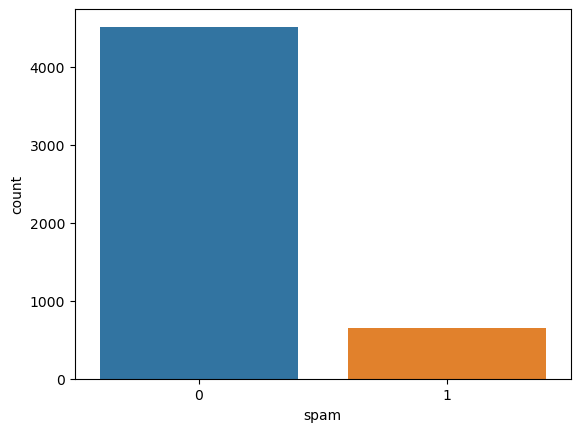

In [223]:
sns.countplot(x ='spam', data = data)

In [99]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


### 2. EDA

In [100]:
import nltk

In [101]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [197]:
len(nltk.sent_tokenize(data['text'][0]))

2

In [224]:
# Syntax for apply function - dataframe.apply(func)
# apply takes a function and applies it to all values of pandas series.

data['no. of chars'] = data['text'].apply(len)
data.head()

,text,spam,no. of chars
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [103]:
# Tokenization is the process of breaking down a piece of text such as a sentence,
# or a paragraph into smaller units called tokens

# tokens are essentially the individual word/ meaningful units of text that we want to work with.

In [225]:
# word_tokenize() - function in Python that splits a given sentence into words using the NLTK library.
# syntax for lambda function - lambda arguments : expression

data['no. of words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,text,spam,no. of chars,no. of words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [226]:
# sent_tokenize() - function is used to segment a given text into a list of sentences

data['no. of sentances'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,text,spam,no. of chars,no. of words,no. of sentances
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [106]:
data[['no. of sentances','no. of words','no. of chars']].describe()

,no. of sentances,no. of words,no. of chars
count,5572.000000,5572.000000,5572.000000
mean,1.972182,18.697057,80.333094
std,1.420084,13.743872,59.842934
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,61.000000
75%,2.000000,27.000000,122.000000
max,28.000000,220.000000,910.000000


In [107]:
data[data['spam']==0][['no. of sentances','no. of words','no. of chars']]

,no. of sentances,no. of words,no. of chars
0,2,24,111
1,2,8,29
3,1,13,49
4,1,15,61
6,2,18,77
...,...,...,...
5565,1,4,12
5568,1,9,38
5569,2,15,57
5570,1,27,125


In [108]:
data[data['spam']==1][['no. of sentances','no. of words','no. of chars']]

,no. of sentances,no. of words,no. of chars
2,2,37,155
5,4,39,150
8,5,32,160
9,3,31,154
11,3,31,136
...,...,...,...
5537,3,18,90
5540,6,38,164
5547,5,35,160
5566,1,30,147


<Axes: xlabel='no. of chars', ylabel='Count'>

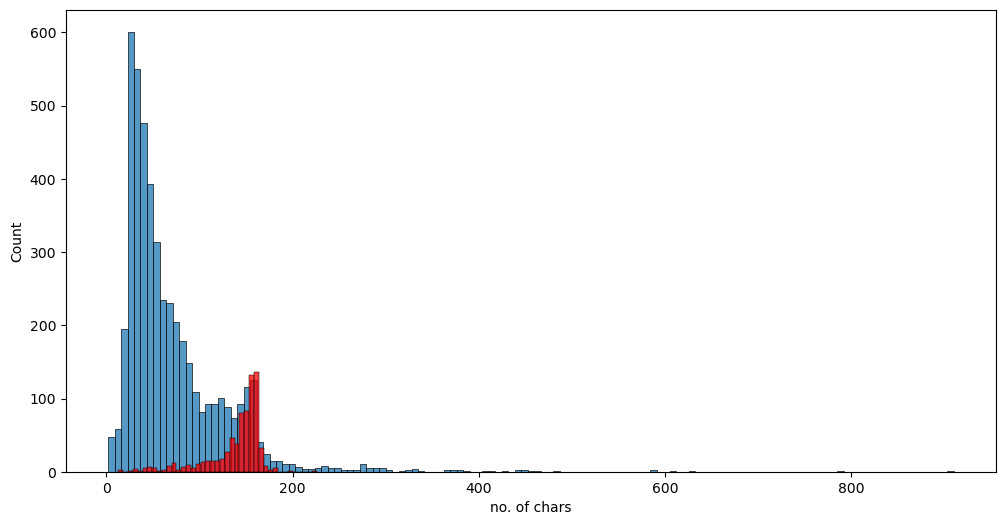

In [109]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['spam']==0]['no. of chars'])
sns.histplot(data[data['spam']==1]['no. of chars'],color='red')

<Axes: xlabel='no. of sentances', ylabel='Count'>

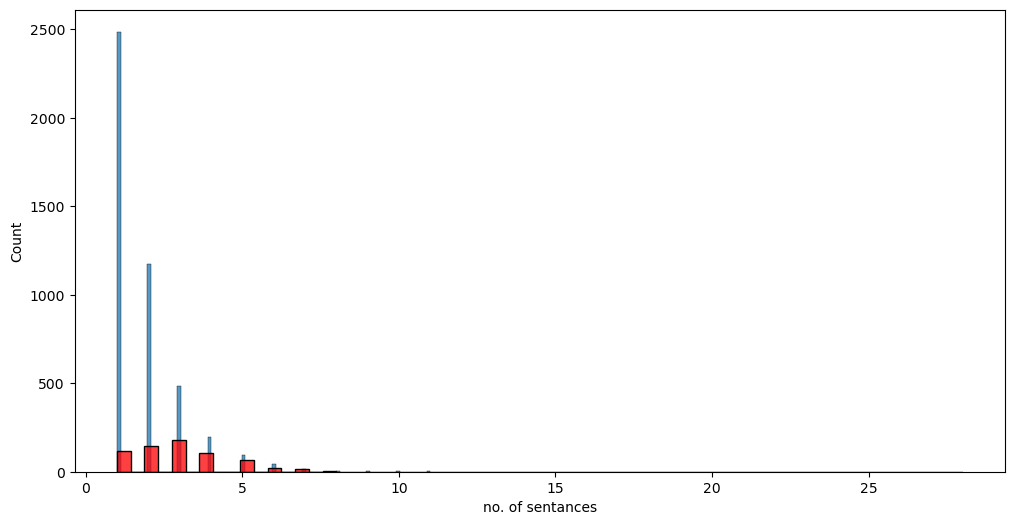

In [238]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['spam']==0]['no. of sentances'])
sns.histplot(data[data['spam']==1]['no. of sentances'],color='red')

In [ ]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['spam']==0]['no. of words'])
sns.histplot(data[data['spam']==1]['no. of words'],color='red')

C:\Users\DELL\AppData\Local\Temp\ipykernel_18424\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

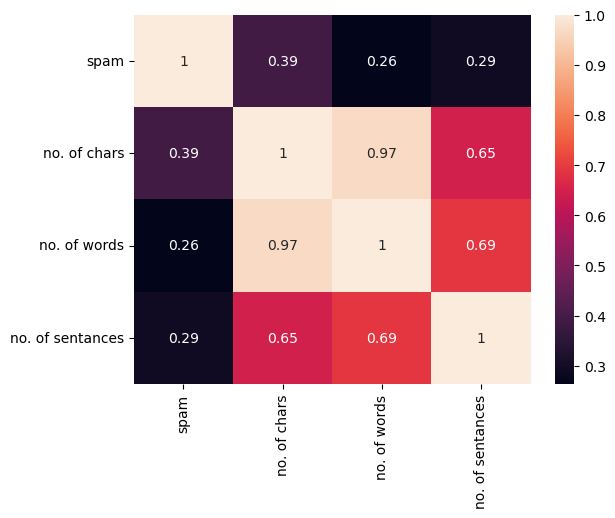

In [111]:
sns.heatmap(data.corr(),annot=True)

In [240]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### Data Preprocessing

Text is not in numbers or tables. It is unstructured. If we feed this data to any ML algo it will fail to generate coorec predictions

Hence its important to convert text to structured format for the computer to understand better

1. Lower Case - Converting all text characters into lowercases, reduces complexity of distuinguishing words
2. Tokenization
3. Remove Stop words and punctuation - Stop words are wrds commonly used such as 'and','the','is' that are typically removed from text during pre-processing as they carry little meaning and donot contribute significantly to the overall understanding of the text. 
4. Remove special characters - !~@#$%^&*(),<>./?;'[]{}
5. Stemming - Process of converting / reducing words to their base words

In [112]:
data.head()

,text,spam,no. of chars,no. of words,no. of sentances
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [113]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
from nltk.corpus import stopwords

stopwords.words('english')

list

In [256]:
step4

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

'work'

In [255]:
step3 = [i for i in nltk.word_tokenize(data['text'][0].lower()) if i.isalnum()]
step4 = [i for i in step3 if i not in stopwords.words('english') or string.punctuation]
step5 = [ps.stem(i) for i in step4 ]

['go',
 'until',
 'jurong',
 'point',
 'crazi',
 'avail',
 'onli',
 'in',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amor',
 'wat']

In [116]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
import string

# Process of converting / reducing words to their base words - Two types - PorterStemmer(), LanchesterStemer()
# Porter's Stemming removes the suffixes from words, its quick and simple
# Eg:  “argue”, “argued”, “argues” and “arguing”  “argu”
ps = PorterStemmer()
 
# Aggresive stemmed words compared to porter stemmer
ls = LancasterStemmer()

# Lemmatization
# The words given in Porter's stemmer might not make sense all the time
# to resolve this issue we have "lemmatization". Lemmatization gives meaningful words, uses dictionary in the backend.
# Eg: WordNetLemmatizer, LancersterLemmatizer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [i for  i in text if i.isalnum()]
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation] 
    text = [ps.stem(i) for i in text]
    return " ".join(text)
    

In [261]:
data['transform_text'] = data['text'].apply(transform_text)

data['transform_text'][:5]

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: transform_text, dtype: object

In [118]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [262]:
from wordcloud import WordCloud

spam_wc = WordCloud(width=800,height=800,min_font_size=10,background_color='black')
spam_wc.generate(data[data['spam']==1]['transform_text'].str.cat(sep = ''))


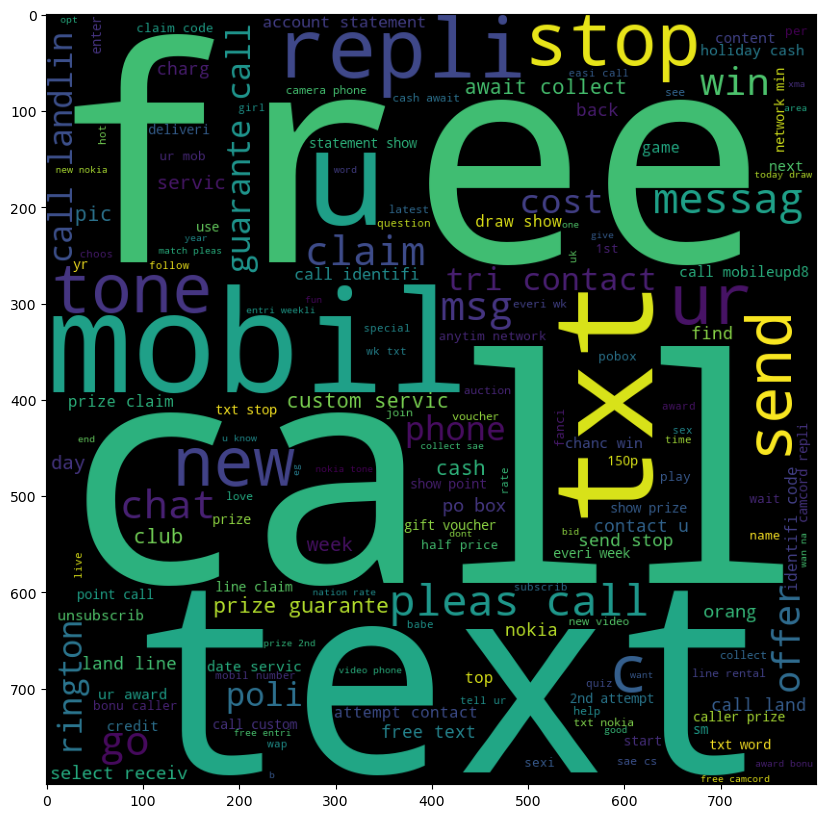

In [263]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [121]:
ham_wc = WordCloud(width=800,height=800,min_font_size=10,background_color='white')
ham_wc.generate(data[data['spam']==0]['transform_text'].str.cat(sep = ''))

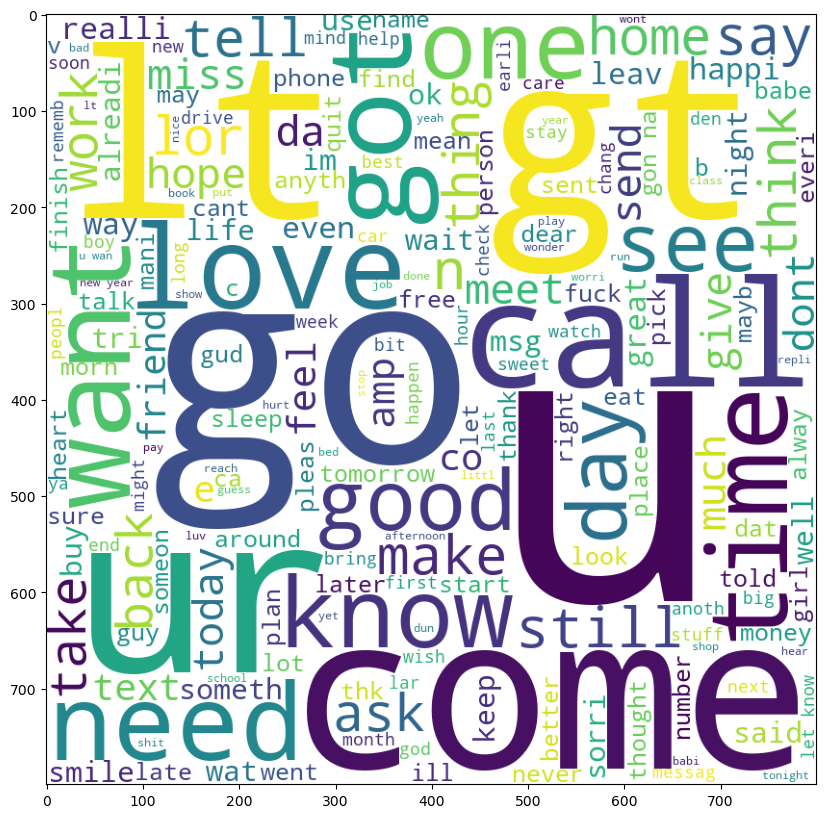

In [122]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [123]:
data.head()

,text,spam,no. of chars,no. of words,no. of sentances,transform_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [124]:
corpus = []

for msg in data[data['spam']==1]['transform_text'].tolist():
    for wor in msg.split():
        corpus.append(wor)
corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [264]:
from collections import Counter

dict_count = Counter(corpus).most_common(40)
df_count = pd.DataFrame((dict_count))
df_count

# plot a graph

sns.barplot(x = df_count[0],y = df_count[1],)
plt.xlabel('words')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


### 4. Model Building

- Vectorization the data - Converting words into vectors using BOW,TFIDF,OHE
- Bag Of Words - Convert to frequent words 
- TFIDF

#####  Bag Of Words

In [267]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data['transform_text']).toarray()
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

##### TFIDF

In [ ]:
# Documents - each sentence is called a document

In [169]:
# Term Frequency - Frequency of term in the document - assigns higher weight common words
# Document Frequency - Frequency of term ain all the documents. higher df - rare words

In [ ]:
# Term Frequency - No of rep of words in a sentence / No of words in a sentence
# Inverse Document Frequency - log(no. of sentences/No of sentences containing words)

In [ ]:
# Interpretation of TDIDF score

# High TFIDF for a word in that document
# - High TF - word is common in that document
# - High IDF - rare across all other docs

# Low TFIDF for a word in that document
# - Low TF - word is rare in that document
# - Low IDF - common in all docs

# TFIDF = 0 
# Word does not appear at all in that document 
# Word appears in every single document so it holds no value

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['transform_text']).toarray()
X.shape


(5572, 3000)

In [128]:
y = data['spam']
y.shape

(5572,)

In [129]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### Fit all models

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


##### Predictions

In [ ]:
lrc = LogisticRegression()
svc = SVC(kernel='rbf', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)


##### Performance of model

In [144]:
clfs = {
    'SVC' : svc,
    'KNN' : knc,
    'DTC' : dtc,
    'RFC' : rfc,
    'LR': lrc, 
    'AdaBoost': abc,
    'BaggingClassifer': bc

}

In [270]:
lrc = LogisticRegression()
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)

In [271]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
# Focus on precision. 
# This is important in environments where missing important emails due to them 
# being mistakenly classified as spam would be highly detrimental,
# such as in critical business communications.

In [150]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748878923766816
Precision -  0.9621212121212122
For  KNN
Accuracy -  0.9192825112107623
Precision -  1.0
For  DTC
Accuracy -  0.9399103139013453
Precision -  0.9029126213592233
For  RFC
Accuracy -  0.9748878923766816
Precision -  1.0
For  LR
Accuracy -  0.9461883408071748
Precision -  0.9166666666666666
For  AdaBoost
Accuracy -  0.9659192825112107
Precision -  0.9827586206896551
For  BaggingClassifer
Accuracy -  0.9668161434977578
Precision -  0.9064748201438849


In [151]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [152]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.919283,1.000000
3,RFC,0.974888,1.000000
5,AdaBoost,0.965919,0.982759
0,SVC,0.974888,0.962121
4,LR,0.946188,0.916667
6,BaggingClassifer,0.966816,0.906475
2,DTC,0.939910,0.902913


#### Visualize the performance of algorithms

<Axes: xlabel='Algorithm'>

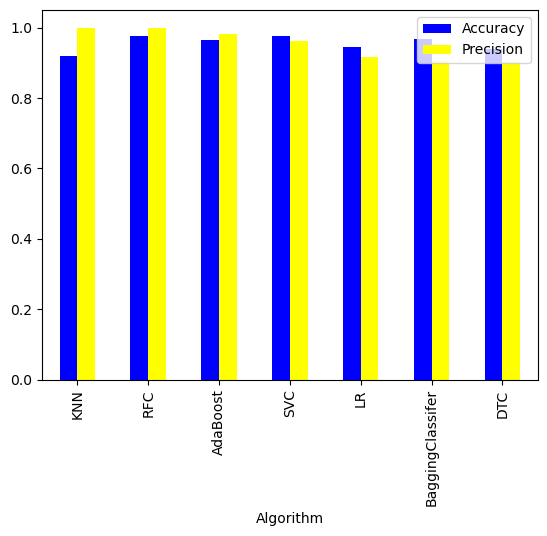

In [153]:
performance_df.plot(x='Algorithm',y=['Accuracy','Precision'],kind='bar',color=['blue','yellow'])

In [154]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(abc,open('model.pkl','wb'))